In [1]:
# import beberapa library yang digunakan
import numpy as numpy
import scipy as scipy
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import cluster
from sklearn import metrics

import glob
import time

# import library yang sudah dimodifikasi mencadi dynamic epsilon DBSCAN
import dynamicDBSCAN as ddbscan

In [4]:
'''Proses eksekusi clustering dynamic epsilon DBSCAN pada data gempa'''
# Baca data gempa dari excel dengan tipe dataframe
data = pd.read_excel('DATA_USGS.xls')
d1 = pd.DataFrame()
# ambil fitur latitude, longitude, dan magnitude
d1['lat'] = data.iloc[:,1]
d1['lon'] = data.iloc[:,2]
# convert menjadi Radius of Perception dengan persamaan McCue
d1['mag'] = numpy.exp(data.iloc[:,3]/ 1.01 - 0.13)
# set magnitude menjadi parameter epsilon
Epsilon=(d1.loc[:,'mag'])
d1['eps']=Epsilon
MinimumPoints=4 # set MinPts

start_time = time.time() # mulai hitung waktu eksekusi program
# Jalankan algoritma dynamic epsilon DBSCAN
result = ddbscan.MyDBSCAN(d1,Epsilon,MinimumPoints) 
times = (time.time() - start_time) # hitung waktu eksekusi
# Simpan hasil clustering
d1['res']=result
d2 = d1.loc[d1.loc[:,'res']!=-1,:] # ambil titik yang bukan noise

===== number of clusters: 2 ======
Silhouette index: 0.225
Davies Bouldin index: 0.675
Calinski Harabasz index: 27.685
Time: 110686.395 s


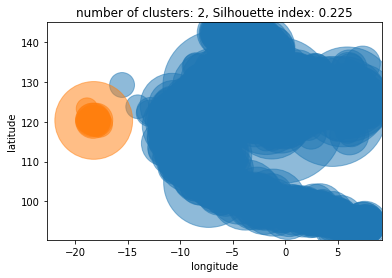

In [5]:
'''Evaluasi hasil clustering'''
if len(d2)>0: # Jika jumlah cluster lebih dari 0
    # hitung nilai cluster validity dengan Silhouette, Davies-Bouldin, dan Calinsi-Harabasz index
    sil = metrics.silhouette_score(d2.iloc[:,0:2], d2.loc[:,'res'])
    db = metrics.davies_bouldin_score(d2.iloc[:,0:2], d2.loc[:,'res'])
    ch = metrics.calinski_harabasz_score(d2.iloc[:,0:2], d2.loc[:,'res'])
    # Tampilkan hasil evaluasinya
    print('===== number of clusters: %d ======' % (len(d2.loc[:,'res'].unique())))
    print('Silhouette index: %0.3f' % sil)
    print('Davies Bouldin index: %0.3f' % db)
    print('Calinski Harabasz index: %0.3f' % ch)
    print('Time: %0.3f s' % times)
    
    # Plot grafik hasil cluster dengan scatter plot
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    for i in d2.loc[:,'res'].unique():
        ax.scatter(d1.loc[d1.loc[:,'res']==i,'lat'],d1.loc[d1.loc[:,'res']==i,'lon'],...
                   s=d1.loc[d1.loc[:,'res']==i,'eps']*10, alpha =  0.5 )
    ax.set_xlabel('longitude')
    ax.set_ylabel('latitude')
    plt.title('number of clusters: %d, Sil index: %0.3f' %(len(d2.loc[:,'res'].unique()), sil))
    plt.savefig('USGS_%d.png' %(MinimumPoints), transparent=True)

In [5]:
Data = pd.DataFrame()
Data['x'] = data.loc[:,'X']
Data['y'] = data.loc[:,'Y']
Data['Rp'] = data.loc[:,'Rp']

In [11]:
d1.to_excel('output_USGS_minpts_4.xlsx')

In [28]:
d2 = pd.DataFrame()

In [29]:
d2['X']=Data[:,0]
d2['Y']=Data[:,1]
d2['RP']=Data[:,2]
d2['cluster']=result

In [30]:
d2

,X,Y,RP,cluster
0,14201.984375,313.353149,92.154392,1.0
1,14314.651367,402.310730,166.921685,1.0
2,14275.110352,397.081085,50.876745,1.0
3,12111.271484,-970.899536,92.154392,0.0
4,10924.483398,168.889297,184.294432,11.0
5,13381.760742,-1035.132202,92.154392,0.0
6,11170.888672,-189.630402,75.599188,10.0
7,14160.830078,270.193817,46.080784,1.0
8,13649.672852,495.685394,62.018067,6.0
9,13651.120117,479.448730,273.848287,6.0


In [31]:
d2.to_excel('hasil_dbscan_minpoint_20.xlsx')

In [2]:
d2.plot.scatter(x='X',y='Y',s=d2['RP'],alpha=0.5)

NameError: name 'd2' is not defined